In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.utils import shuffle
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [7]:
#excel_data = pd.read_excel('data/cleaned.xls', sheet_name = 'data')

from google.colab import files
uploaded = files.upload()

excel_data = pd.read_excel('cleaned.xls')
headers = excel_data.columns.values
excel_data.head()

Saving cleaned.xls to cleaned.xls


,Gender,Age,Localization of pain at the onset of the disease,Location of the pain now,Pain intensity,Pain intensifying factors,Pain relieving factors,Pain progression,Duration of pain,The nature of the pain at the beginning of the disease,The nature of the pain now,Nausea and vomiting,Appetite,Defecation,Urine,Previous indigestion,Jaundice,Previous abdominal surgery,Anxieties,Mental state,Skin,Temperature,Pulse,Breathing movements of the abdominal,Abdominal gas,Location of bedsores,Blumberg's symptom,Muscle defense,Increased tension in the abdominal,Pathological resistance,Murphy's symptom,Diagnosis class
0,2,5,7,7,1,3,2,1,3,2,2,3,3,1,2,1,1,1,1,2,3,4,5,2,2,8,2,1,2,2,1,1
1,2,5,4,1,3,3,1,2,3,2,3,3,1,1,1,2,1,1,1,1,3,4,7,2,1,3,2,1,1,2,1,1
2,2,3,4,5,2,3,2,3,4,2,3,3,3,2,2,2,1,1,1,2,2,4,4,1,2,2,1,2,1,1,1,1
3,2,5,7,2,1,3,1,2,2,2,3,3,1,3,2,2,1,1,1,1,2,4,7,2,1,11,2,2,2,1,1,1
4,2,3,4,11,2,3,3,2,3,1,2,3,1,1,2,1,1,1,2,1,2,4,4,1,2,6,2,1,2,2,2,1


In [8]:
excel_data.groupby('Diagnosis class').size()

Diagnosis class
1    141
2     17
3     29
4     28
5     55
6     32
7    157
8     17
dtype: int64

In [9]:
diagnosis_classes = len(excel_data.groupby('Diagnosis class').size())
diagnosis_classes = [ str(x + 1) for x in range(diagnosis_classes)]
diagnosis_classes

['1', '2', '3', '4', '5', '6', '7', '8']

In [10]:
excel_data = shuffle(excel_data)
# one hot encoding
for i in headers:
    le = LabelEncoder()
    le.fit(excel_data[str(i)])
    excel_data[str(i)] = le.transform(excel_data[str(i)])
    encoded = to_categorical(excel_data[str(i)])
    
    if len(encoded[0]) > 2 and i != 'Diagnosis class':
        insert_loc = np.where(headers==i)
        insert_loc = insert_loc[0][0]

        excel_data = excel_data.drop(columns = i)
        for label in range(len(encoded[0])):
            excel_data.insert(int(insert_loc), str(i) + "_" + str(label), encoded[:,label])

excel_data.head()

,Gender,Age_4,Localization of pain at the onset of the disease_10,Location of the pain now_10,Pain intensity_2,Pain intensifying factors_3,Pain relieving factors_2,Pain progression_2,Duration of pain_3,The nature of the pain at the beginning of the disease_2,The nature of the pain now_3,Nausea and vomiting_2,Appetite_2,Defecation_2,Defecation_1,Defecation_0,Appetite_1,Appetite_0,Nausea and vomiting_1,Mental state_2,Skin_2,Temperature_5,Pulse_8,Pulse_7,Pulse_6,Location of bedsores_11,Location of bedsores_10,Location of bedsores_9,Location of bedsores_8,Location of bedsores_7,Location of bedsores_6,Location of bedsores_5,Location of bedsores_4,Location of bedsores_3,Location of bedsores_2,Location of bedsores_1,Location of bedsores_0,Pulse_5,Pulse_4,Pulse_3,...,Pain intensifying factors_0,Pain intensity_1,Pain intensity_0,Location of the pain now_9,Location of the pain now_8,Location of the pain now_7,Location of the pain now_6,Location of the pain now_5,Location of the pain now_4,Location of the pain now_3,Location of the pain now_2,Location of the pain now_1,Location of the pain now_0,Localization of pain at the onset of the disease_9,Localization of pain at the onset of the disease_8,Localization of pain at the onset of the disease_7,Localization of pain at the onset of the disease_6,Localization of pain at the onset of the disease_5,Localization of pain at the onset of the disease_4,Localization of pain at the onset of the disease_3,Localization of pain at the onset of the disease_2,Localization of pain at the onset of the disease_1,Localization of pain at the onset of the disease_0,Age_3,Age_2,Age_1,Age_0,Urine,Previous indigestion,Jaundice,Previous abdominal surgery,Anxieties,Breathing movements of the abdominal,Abdominal gas,Blumberg's symptom,Muscle defense,Increased tension in the abdominal,Pathological resistance,Murphy's symptom,Diagnosis class
114,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0
354,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1,1,1,0,0,1,1,1,6
130,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,0,1,1,1,0
201,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1,1,1,1,1,3
270,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,0,1,0,1,5


In [ ]:
# sc = StandardScaler() 
# data = sc.fit_transform(excel_data)
# scaled_df = pd.DataFrame(excel_data, columns=headers)

# for i in headers:
#     excel_data[str(i)]= scaled_df[str(i)]
# data[' Age '], data['Alkphos'], data['sgpt'], data['sgot'],data['TP'],data['ALB'],data['TB'],data['DB'] = dt[' Age '], dt['Alkphos'], dt['sgpt'], dt['sgot'] ,dt['TP'],dt['ALB'],dt['TB'],dt['DB']
#data[' Age '] = dt[' Age ']

In [11]:
# X_data set with arguments
# Y_data set with diagnostick class

Y_data = excel_data['Diagnosis class']
X_data = excel_data.drop(columns = 'Diagnosis class')

In [12]:
X_data.head()

,Gender,Age_4,Localization of pain at the onset of the disease_10,Location of the pain now_10,Pain intensity_2,Pain intensifying factors_3,Pain relieving factors_2,Pain progression_2,Duration of pain_3,The nature of the pain at the beginning of the disease_2,The nature of the pain now_3,Nausea and vomiting_2,Appetite_2,Defecation_2,Defecation_1,Defecation_0,Appetite_1,Appetite_0,Nausea and vomiting_1,Mental state_2,Skin_2,Temperature_5,Pulse_8,Pulse_7,Pulse_6,Location of bedsores_11,Location of bedsores_10,Location of bedsores_9,Location of bedsores_8,Location of bedsores_7,Location of bedsores_6,Location of bedsores_5,Location of bedsores_4,Location of bedsores_3,Location of bedsores_2,Location of bedsores_1,Location of bedsores_0,Pulse_5,Pulse_4,Pulse_3,...,Pain intensifying factors_1,Pain intensifying factors_0,Pain intensity_1,Pain intensity_0,Location of the pain now_9,Location of the pain now_8,Location of the pain now_7,Location of the pain now_6,Location of the pain now_5,Location of the pain now_4,Location of the pain now_3,Location of the pain now_2,Location of the pain now_1,Location of the pain now_0,Localization of pain at the onset of the disease_9,Localization of pain at the onset of the disease_8,Localization of pain at the onset of the disease_7,Localization of pain at the onset of the disease_6,Localization of pain at the onset of the disease_5,Localization of pain at the onset of the disease_4,Localization of pain at the onset of the disease_3,Localization of pain at the onset of the disease_2,Localization of pain at the onset of the disease_1,Localization of pain at the onset of the disease_0,Age_3,Age_2,Age_1,Age_0,Urine,Previous indigestion,Jaundice,Previous abdominal surgery,Anxieties,Breathing movements of the abdominal,Abdominal gas,Blumberg's symptom,Muscle defense,Increased tension in the abdominal,Pathological resistance,Murphy's symptom
114,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0
354,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1,1,1,0,0,1,1,1
130,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,0,1,1,1
201,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1,1,1,1,1
270,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,0,1,0,1


In [13]:
# ratio 1/2 to 1/2
X_train = X_data[:238]
Y_train = Y_data[:238]

X_test = X_data[238:]
Y_test = Y_data[238:]

kfold = [[X_train, Y_train, X_test, Y_test], [ X_test, Y_test, X_train, Y_train]]
cvscores = []

number_of_neurons = int(input("Enter the number of neurons: "))
momentum_value = float(input("Enter the momentum value: (0 means no moment, allowed floating point numbers) "))

model = Sequential()
model.add(Dense(units = 32,activation = 'relu',input_dim = 106)) # input layer
model.add(Dense(units = number_of_neurons, activation = 'relu')) # hidden layer
model.add(Dense(units = 8,kernel_initializer= 'normal', activation = 'softmax')) # output wyjściowa

Enter the number of neurons: 100
Enter the momentum value: (0 means no moment, allowed floating point numbers) 0


In [14]:
for X_train, Y_train, X_test, Y_test in kfold:

    model.compile(optimizer= SGD(lr = 0.07, momentum=momentum_value),loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
    model.fit(X_train, Y_train, epochs = 30,shuffle = True, verbose = 2, validation_data=(X_test, Y_test))
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
8/8 - 16s - loss: 2.0349 - accuracy: 0.1765 - val_loss: 1.9454 - val_accuracy: 0.2395
Epoch 2/30
8/8 - 0s - loss: 1.9037 - accuracy: 0.2605 - val_loss: 1.8177 - val_accuracy: 0.3697
Epoch 3/30
8/8 - 0s - loss: 1.7880 - accuracy: 0.3109 - val_loss: 1.7254 - val_accuracy: 0.3739
Epoch 4/30
8/8 - 0s - loss: 1.7010 - accuracy: 0.3613 - val_loss: 1.6665 - val_accuracy: 0.4034
Epoch 5/30
8/8 - 0s - loss: 1.6394 - accuracy: 0.3908 - val_loss: 1.6388 - val_accuracy: 0.4454
Epoch 6/30
8/8 - 0s - loss: 1.5844 - accuracy: 0.4580 - val_loss: 1.5926 - val_accuracy: 0.4832
Epoch 7/30
8/8 - 0s - loss: 1.5124 - accuracy: 0.5252 - val_loss: 1.5410 - val_accuracy: 0.5420
Epoch 8/30
8/8 - 0s - loss: 1.4310 - accuracy: 0.6134 - val_loss: 1.4689 - val_accuracy: 0.6303
Epoch 9/30
8/8 - 0s - loss: 1.3374 - accuracy: 0.6471 - val_loss: 1.3789 - val_accuracy: 0.6681
Epoch 10/30
8/8 - 0s - loss: 1.2260 - accuracy: 0.6933 - val_loss: 1.3180 - val_accuracy: 0.6387
Epoch 11/30
8/8 - 0s - loss: 1.1128 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


8/8 - 1s - loss: 0.2857 - accuracy: 0.9286 - val_loss: 0.1491 - val_accuracy: 0.9664
Epoch 2/30
8/8 - 0s - loss: 0.2471 - accuracy: 0.9244 - val_loss: 0.1578 - val_accuracy: 0.9664
Epoch 3/30
8/8 - 0s - loss: 0.2020 - accuracy: 0.9538 - val_loss: 0.1613 - val_accuracy: 0.9664
Epoch 4/30
8/8 - 0s - loss: 0.1818 - accuracy: 0.9580 - val_loss: 0.1294 - val_accuracy: 0.9622
Epoch 5/30
8/8 - 0s - loss: 0.1537 - accuracy: 0.9748 - val_loss: 0.1174 - val_accuracy: 0.9706
Epoch 6/30
8/8 - 0s - loss: 0.1368 - accuracy: 0.9748 - val_loss: 0.1030 - val_accuracy: 0.9748
Epoch 7/30
8/8 - 0s - loss: 0.1288 - accuracy: 0.9706 - val_loss: 0.0994 - val_accuracy: 0.9706
Epoch 8/30
8/8 - 0s - loss: 0.1079 - accuracy: 0.9874 - val_loss: 0.1079 - val_accuracy: 0.9706
Epoch 9/30
8/8 - 0s - loss: 0.1000 - accuracy: 0.9916 - val_loss: 0.1492 - val_accuracy: 0.9538
Epoch 10/30
8/8 - 0s - loss: 0.0931 - accuracy: 0.9916 - val_loss: 0.1038 - val_accuracy: 0.9664
Epoch 11/30
8/8 - 0s - loss: 0.0811 - accuracy: 0.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3424      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 808       
Total params: 7,532
Trainable params: 7,532
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Run classifier, using a model that is too regularized to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.04)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
cnf_matrix = confusion_matrix(Y_test, y_pred)

Confusion matrix, without normalization
[[76  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  1  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 1  0  0  0 30  0  0  0]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 1  0  0  0  0  0  1  8]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.9  0.   0.   0.   0.   0.   0.1  0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.03 0.   0.   0.   0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.1  0.   0.   0.   0.   0.   0.1  0.8 ]]


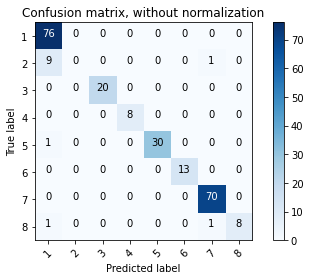

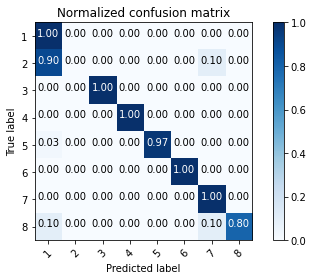

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=diagnosis_classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=diagnosis_classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()